In [1]:
import pandas as pd
import sklearn

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xnew = pca.fit(X).transform(X)

In [5]:
dfpca =pd.DataFrame(Xnew,columns=['PC1','PC2'])
dfclass=pd.DataFrame(iris.target,columns=['class'])
dfpca=pd.concat([dfpca,dfclass],axis=1)
dfpca.head()

,PC1,PC2,class
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [6]:
kclu=KMeans(n_clusters=3)

In [7]:
kclu.fit(Xnew)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
kclu.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [9]:
dfcluster=pd.DataFrame(kclu.labels_,columns=['cluster'])
dfall=pd.concat([dfpca,dfcluster],axis=1)
dfall.head()

,PC1,PC2,class,cluster
0,-2.684126,0.319397,0,1
1,-2.714142,-0.177001,0,1
2,-2.888991,-0.144949,0,1
3,-2.745343,-0.318299,0,1
4,-2.728717,0.326755,0,1


In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
confusion_matrix(dfall['class'], dfall['cluster'])

array([[ 0, 50,  0],
       [ 3,  0, 47],
       [36,  0, 14]])

### Internal Cluster Validity Metrics

In [11]:
metrics.calinski_harabaz_score(Xnew, dfall['cluster']) 

693.708433418847

In [12]:
metrics.silhouette_score(Xnew, dfall['cluster'], metric='euclidean')

0.597676421954799

### External Cluster Validity Metrics

In [13]:
metrics.fowlkes_mallows_score(dfall['class'], dfall['cluster'])

0.8112427991975698

In [14]:
metrics.adjusted_rand_score(dfall['class'], dfall['cluster']) 

0.7163421126838475

In [15]:
metrics.mutual_info_score(dfall['class'], dfall['cluster'])  

0.8090392795466593

In [16]:
metrics.homogeneity_score(dfall['class'], dfall['cluster']) 

0.736419288125285

In [17]:
metrics.completeness_score(dfall['class'], dfall['cluster']) 

0.7474865805095325

In [18]:
metrics.v_measure_score(dfall['class'], dfall['cluster'])    

0.7419116631817838

# Plot clusters in 2D

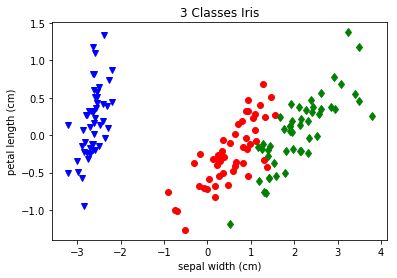

In [19]:
import matplotlib.pyplot as plt

df0=dfall[dfall['class']==0]
df1=dfall[dfall['class']==1]
df2=dfall[dfall['class']==2]

plt.plot(df0['PC1'],df0['PC2'],'bv')
plt.plot(df1['PC1'],df1['PC2'],'ro')
plt.plot(df2['PC1'],df2['PC2'],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Classes Iris')
plt.show()

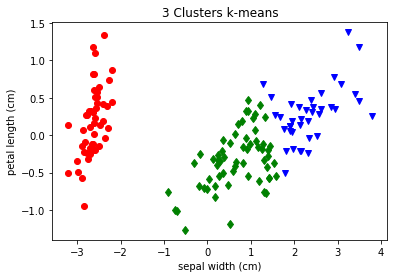

In [20]:
import matplotlib.pyplot as plt

df0=dfall[dfall['cluster']==0]
df1=dfall[dfall['cluster']==1]
df2=dfall[dfall['cluster']==2]

plt.plot(df0['PC1'],df0['PC2'],'bv')
plt.plot(df1['PC1'],df1['PC2'],'ro')
plt.plot(df2['PC1'],df2['PC2'],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Clusters k-means')
plt.show()

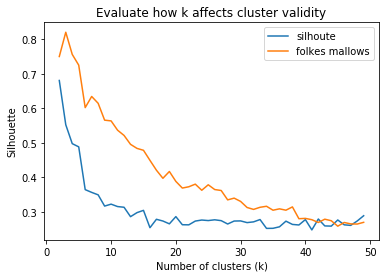

In [21]:
xs=range(2,50)
sils=[]
fms=[]

for i in xs:
    kclu=KMeans(n_clusters=i)
    kclu.fit(X)
    sils.append(metrics.silhouette_score(X, kclu.labels_, metric='euclidean'))
    fms.append(metrics.fowlkes_mallows_score(dfall['class'], kclu.labels_))
plt.plot(xs,sils)
plt.plot(xs,fms)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette')
plt.title('Evaluate how k affects cluster validity')
plt.legend(['silhoute','folkes mallows'])
plt.show()

### Use LDA

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X2 = lda.fit(X, y).transform(X)

In [23]:
dflda =pd.DataFrame(X2,columns=['C1','C2'])
dfclass=pd.DataFrame(iris.target,columns=['class'])
dflda=pd.concat([dflda,dfclass],axis=1)
dflda.head()

,C1,C2,class
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


In [24]:
kclu2=KMeans(n_clusters=3)
kclu2.fit(X2)
dfcluster2=pd.DataFrame(kclu2.labels_,columns=['cluster'])
dfall2=pd.concat([dflda,dfcluster],axis=1)
dfall2.head()

,C1,C2,class,cluster
0,8.061800,0.300421,0,1
1,7.128688,-0.786660,0,1
2,7.489828,-0.265384,0,1
3,6.813201,-0.670631,0,1
4,8.132309,0.514463,0,1


In [25]:
confusion_matrix(dfall2['class'], dfall2['cluster'])

array([[ 0, 50,  0],
       [ 3,  0, 47],
       [36,  0, 14]])

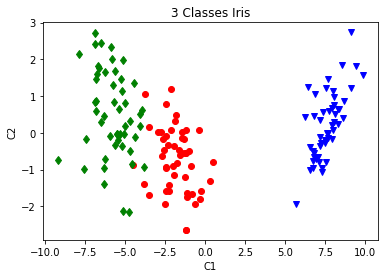

In [26]:
import matplotlib.pyplot as plt

df0=dfall2[dfall2['class']==0]
df1=dfall2[dfall2['class']==1]
df2=dfall2[dfall2['class']==2]

plt.plot(df0['C1'],df0['C2'],'bv')
plt.plot(df1['C1'],df1['C2'],'ro')
plt.plot(df2['C1'],df2['C2'],'gd')

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('3 Classes Iris')
plt.show()

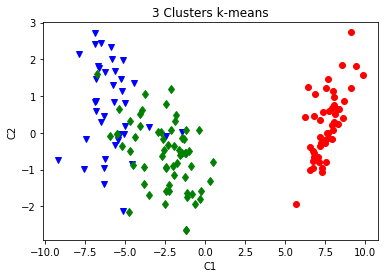

In [27]:
import matplotlib.pyplot as plt

df0=dfall2[dfall2['cluster']==0]
df1=dfall2[dfall2['cluster']==1]
df2=dfall2[dfall2['cluster']==2]

plt.plot(df0['C1'],df0['C2'],'bv')
plt.plot(df1['C1'],df1['C2'],'ro')
plt.plot(df2['C1'],df2['C2'],'gd')

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('3 Clusters k-means')
plt.show()

In [28]:
metrics.calinski_harabaz_score(X2, dfall2['cluster']) 

813.6702634087118

In [29]:
metrics.fowlkes_mallows_score(dfall2['class'], dfall2['cluster'])

0.8112427991975698

## Let's try HAC

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
hacclu=AgglomerativeClustering(n_clusters=3, affinity='manhattan',linkage='average')

In [32]:
hacclu.fit(X2)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [33]:
hacclu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
dfhac=pd.DataFrame(hacclu.labels_,columns=['cluster'])
dfhacall=pd.concat([dflda,dfhac],axis=1)
dfhacall.head()

,C1,C2,class,cluster
0,8.061800,0.300421,0,0
1,7.128688,-0.786660,0,0
2,7.489828,-0.265384,0,0
3,6.813201,-0.670631,0,0
4,8.132309,0.514463,0,0


In [35]:
metrics.calinski_harabaz_score(X2, dfhacall['cluster']) 

1190.6640949136377

In [36]:
metrics.fowlkes_mallows_score(dfhacall['class'], dfhacall['cluster'])

0.9355985958131776

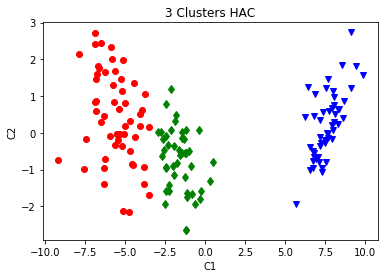

In [37]:
import matplotlib.pyplot as plt

df0=dfhacall[dfhacall['cluster']==0]
df1=dfhacall[dfhacall['cluster']==1]
df2=dfhacall[dfhacall['cluster']==2]

plt.plot(df0['C1'],df0['C2'],'bv')
plt.plot(df1['C1'],df1['C2'],'ro')
plt.plot(df2['C1'],df2['C2'],'gd')

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('3 Clusters HAC')
plt.show()